<a href="https://colab.research.google.com/github/martinclehman/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/S1_Solution_(Aaron).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Strangely, we need to revert to an older version of pandas to do the 
# quantile crosstab code(?)
# see https://github.com/blue-yonder/tsfresh/issues/485
!pip uninstall pandas -y


Uninstalling pandas-0.24.2:
  Successfully uninstalled pandas-0.24.2


In [0]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.9MB/s 


In [0]:
import pandas as pd
pd.__version__

'0.23.4'

In [0]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

import pandas as pd
df = pd.read_csv(data_url, header=None,
                names=['age','year','nodes','survival'])
df.isna().sum()

age         0
year        0
nodes       0
survival    0
dtype: int64

In [0]:
df['survival'].replace(2,0,inplace=True)

In [0]:
df.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
#df['nodes']=df['nodes'].astype('float64')
#df=df.astype('float64')
#df.dtypes

age         int64
year        int64
nodes       int64
survival    int64
dtype: object

In [0]:
df.describe()

,age,year,nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


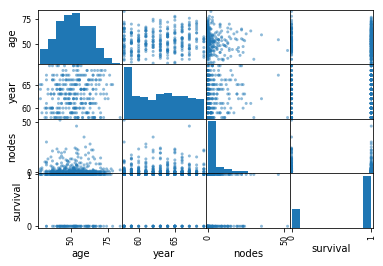

In [0]:
pd.plotting.scatter_matrix(df);

In [0]:
pd.crosstab(df['survival'],pd.qcut(df['nodes'],10,duplicates='drop'))

nodes,"(-0.001, 1.0]","(1.0, 2.0]","(2.0, 3.0]","(3.0, 7.0]","(7.0, 13.0]","(13.0, 52.0]"
survival,,,,,,
0,27,5,7,12,15,15
1,150,15,13,21,12,14


In [0]:
df['nodes'].value_counts() # Further investigation to inform bins

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

In [0]:
node_bins = pd.cut(df['nodes'], bins=[0,1,5,53],right=False)
                                    #'right' determines edge inclusion
node_bins.value_counts()

[0, 1)     136
[1, 5)      94
[5, 53)     76
Name: nodes, dtype: int64

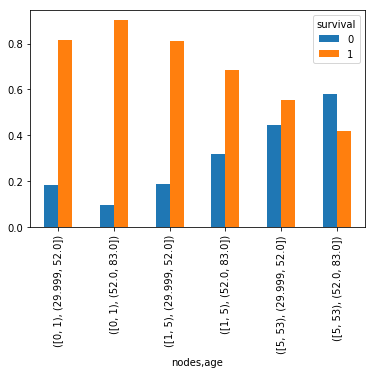

In [0]:
age_median = pd.qcut(df['age'], 2) #splitting by median, i.e. "young"/"old"

pd.crosstab([node_bins,age_median],df['survival'],
          normalize='index').plot(kind = 'bar');

#Split up young and old for 3 sets of node counts

#Interestingly, survival is better for older peole with no nodes, but 
#that's not true with more nodes.

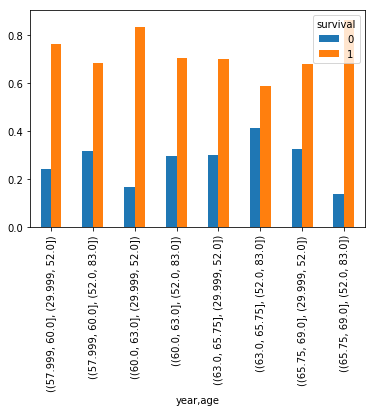

In [0]:
#Let's look at the last variable, year
year_quartiles = pd.qcut(df['year'], 4)

pd.crosstab([year_quartiles, age_median], df['survival'], 
            normalize='index').plot(kind = 'bar');

#Split up young and old for 4 sets of year treatments

#Does appear that the treatment got a litter better in the last years

In [0]:
#Interesting, how does year treated and age relate?
pd.crosstab(age_median, year_quartiles, normalize='columns')

#Appears to have treated more old people during the last 5 years
# comared to first 5 years

year,"(57.999, 60.0]","(60.0, 63.0]","(63.0, 65.75]","(65.75, 69.0]"
age,,,,
"(29.999, 52.0]",0.549451,0.531646,0.508475,0.441558
"(52.0, 83.0]",0.450549,0.468354,0.491525,0.558442


**Answers**

*   Overall, year is positively correlated with survival.
*   Age and nodes are both negatively correlated with survival.
*   Age and year treated are positively correlated with each other, but not enough to become a confounding variable and override the negative relationship between age and survival. 



